In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge , LassoCV ,  RidgeCV,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures , StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
seed =123
import warnings
import seaborn as sns
%pylab inline
#% config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
mydata= pd.read_csv('/Users/zeinah/Downloads/CarPrice_Assignment.csv')
mydata

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
mydata.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
mydata["highway-L/100KM"] = 235 / mydata["highwaympg"]
mydata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highway-L/100KM
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,8.703704
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,8.703704
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,9.038462
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,7.833333
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,10.681818


In [6]:
mydata["cityLKM"] = 235 / mydata["citympg"]
mydata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highway-L/100KM,cityLKM
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,8.703704,11.190476
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,8.703704,11.190476
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,9.038462,12.368421
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,7.833333,9.791667
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,10.681818,13.055556


In [7]:
mydata=mydata.drop(columns=['car_ID'])
mydata=mydata.drop(columns=['highwaympg'])
mydata=mydata.drop(columns=['citympg'])

In [8]:
cormatrix=mydata.corr ()
cormatrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,highway-L/100KM,cityLKM
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,-0.030190,0.063165
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,0.578128,0.474040
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,0.711597,0.659165
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,0.728044,0.682850
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,0.085892,-0.002333
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,0.836742,0.791911
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,0.777077,0.744952
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,0.551965,0.555989
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,0.055402,0.042508
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.067984,-0.223411,-0.296964


In [9]:
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T  
cormatrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,highway-L/100KM,cityLKM
symboling,0.0,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,-0.030190,0.063165
wheelbase,-0.0,0.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,0.578128,0.474040
carlength,-0.0,0.000000,0.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,0.711597,0.659165
carwidth,-0.0,0.000000,0.000000,0.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,0.728044,0.682850
carheight,-0.0,0.000000,0.000000,0.000000,0.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,0.085892,-0.002333
curbweight,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,0.836742,0.791911
enginesize,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,0.777077,0.744952
boreratio,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,0.551965,0.555989
stroke,-0.0,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.186110,0.080940,-0.067964,0.079443,0.055402,0.042508
compressionratio,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.204326,-0.435741,0.067984,-0.223411,-0.296964


In [14]:
cormatrix = cormatrix.stack () 
cormatrix

0    FirstVariable     highway-L/100KM
     SecondVariable            cityLKM
     Correlation              0.955195
1    FirstVariable           carlength
     SecondVariable         curbweight
                            ...       
223  SecondVariable         enginesize
     Correlation                   0.0
224  FirstVariable             cityLKM
     SecondVariable            cityLKM
     Correlation                   0.0
Length: 675, dtype: object

In [15]:
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
cormatrix.head(10)

TypeError: bad operand type for abs(): 'str'

<ipython-input-12-f6646880c720>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all,dtype=np.bool)


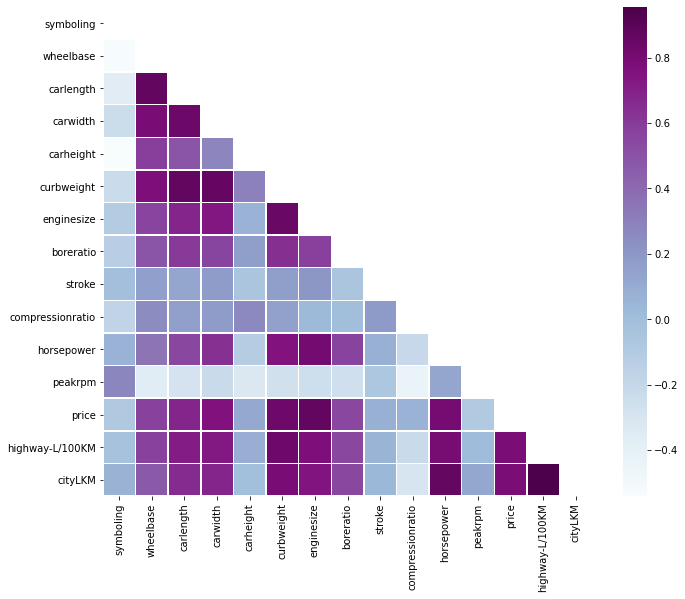

In [12]:
corr_all = mydata.corr()
mask = np.zeros_like(corr_all,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr_all,mask=mask,square=True,linewidths=.5,ax=ax,cmap="BuPu")
plt.show()

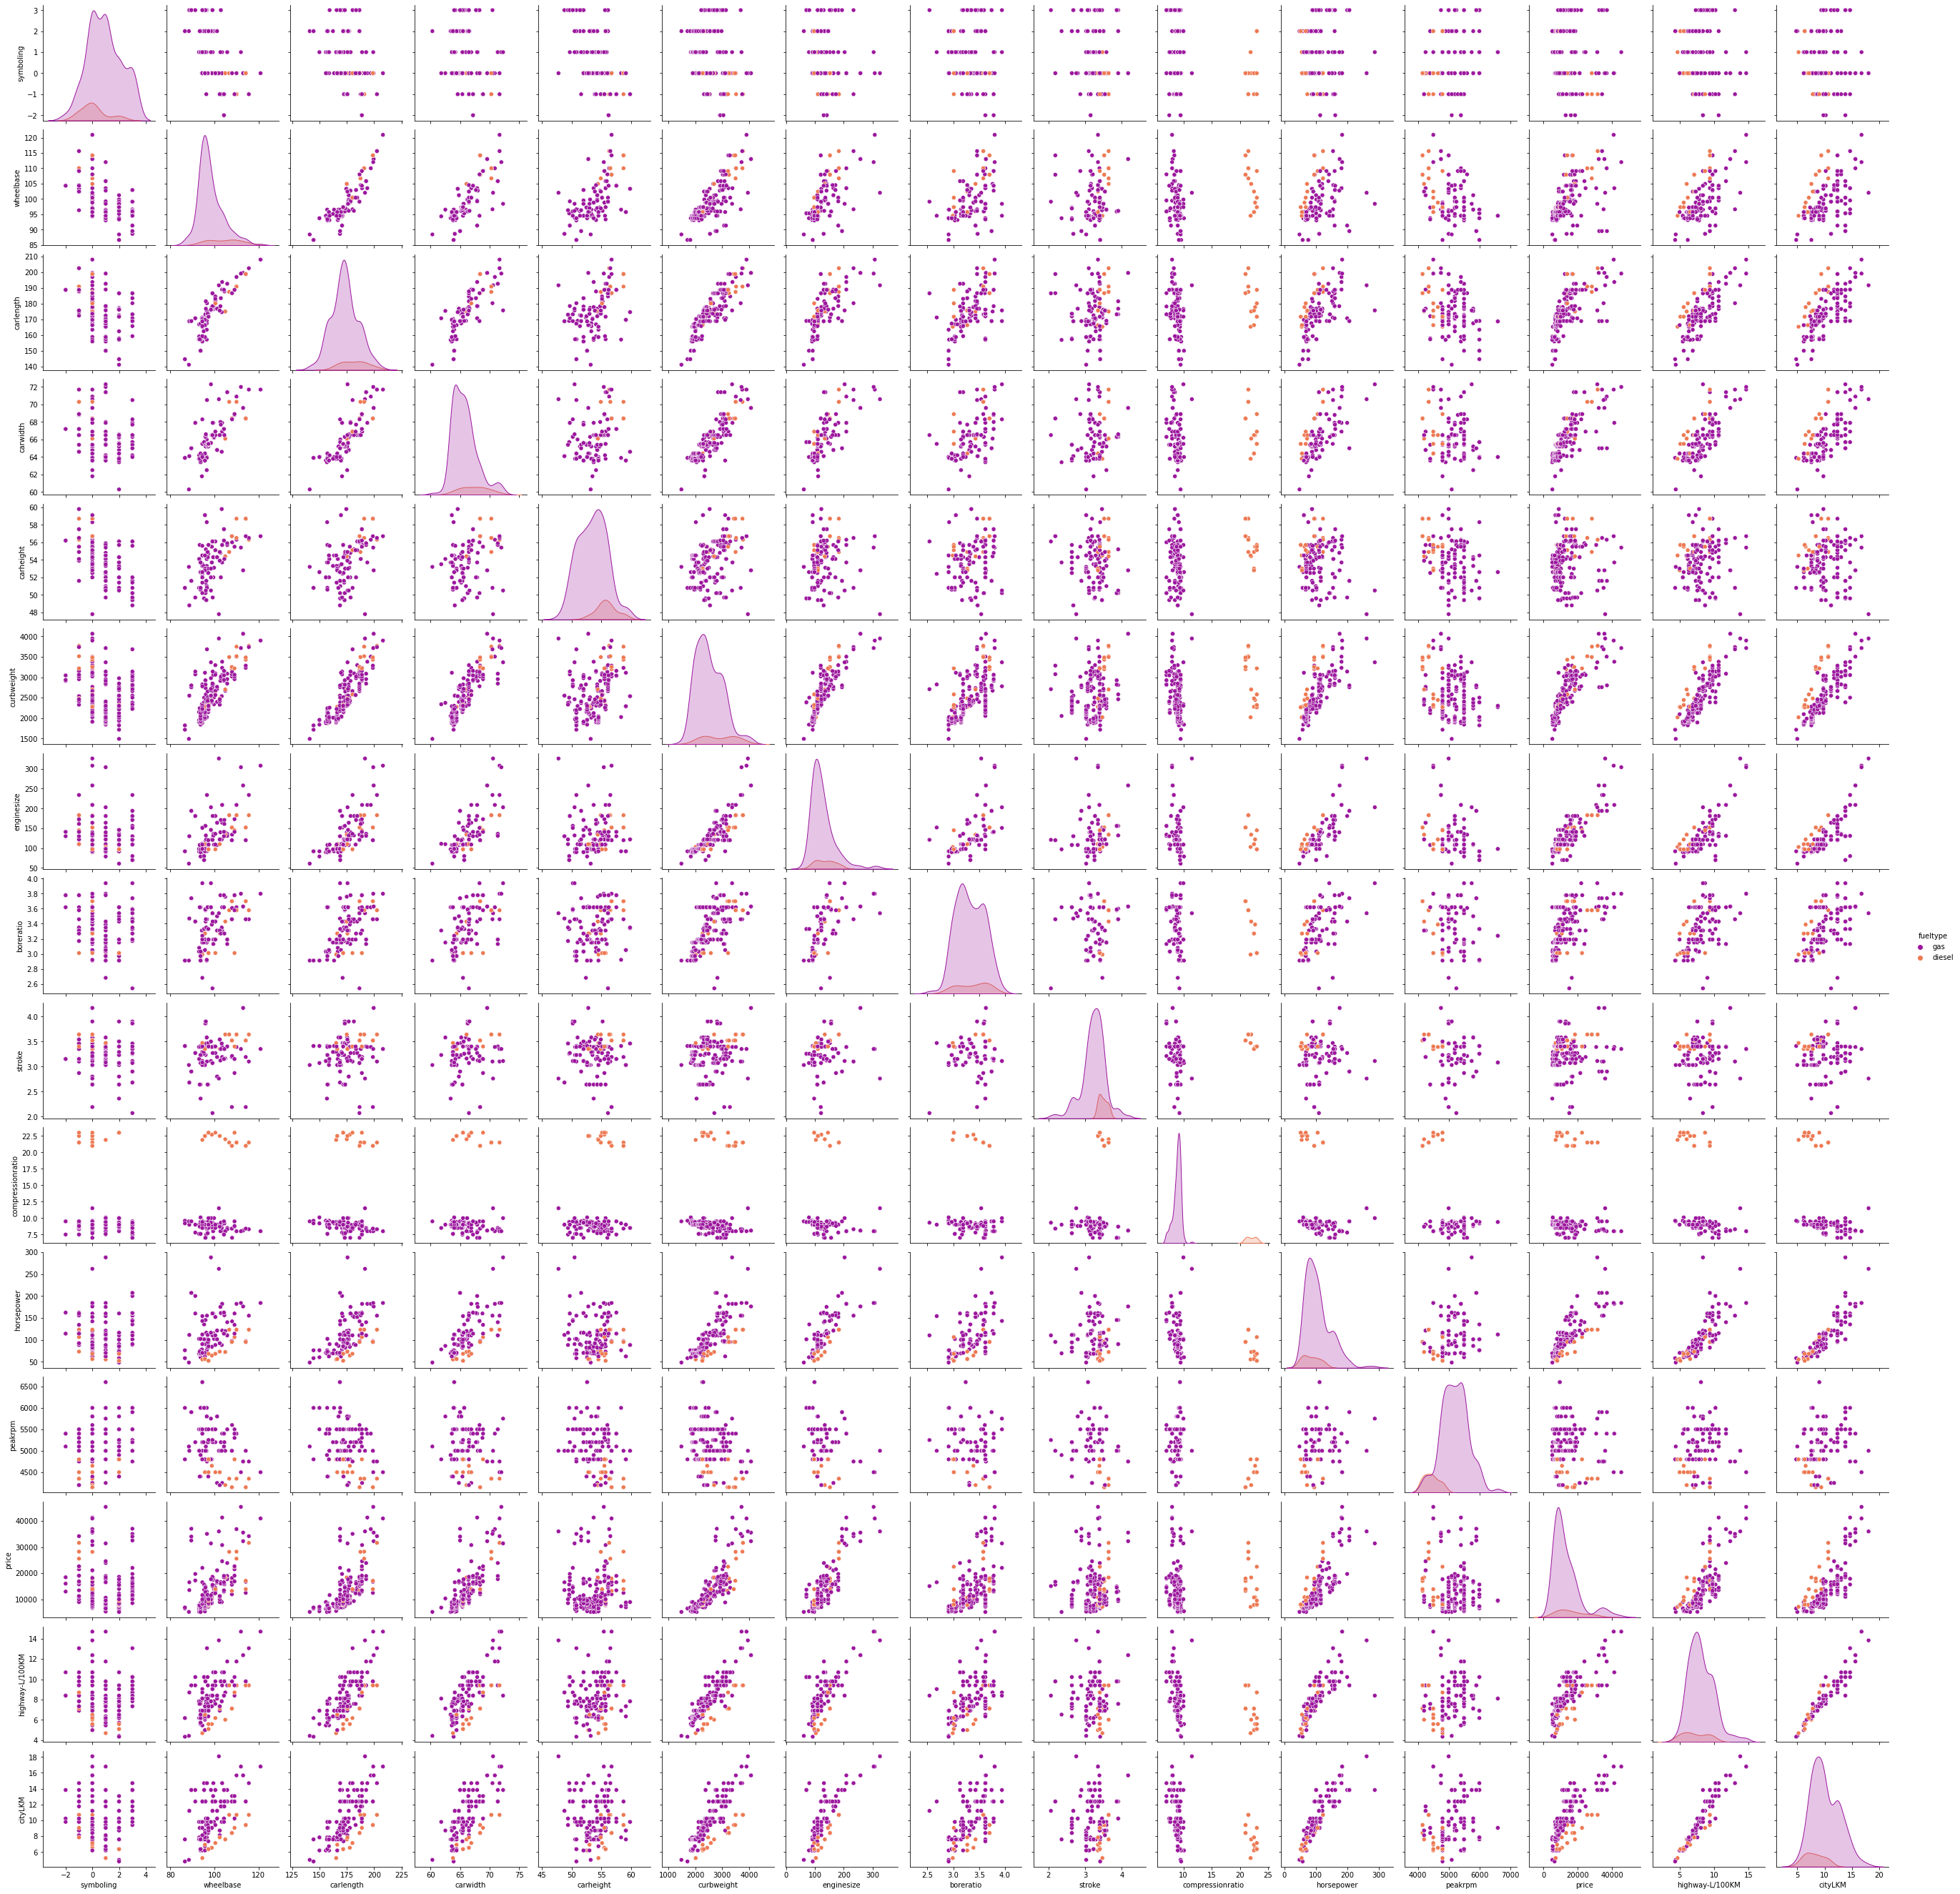

In [13]:
sns.pairplot (mydata, hue = 'fueltype', palette = 'plasma');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


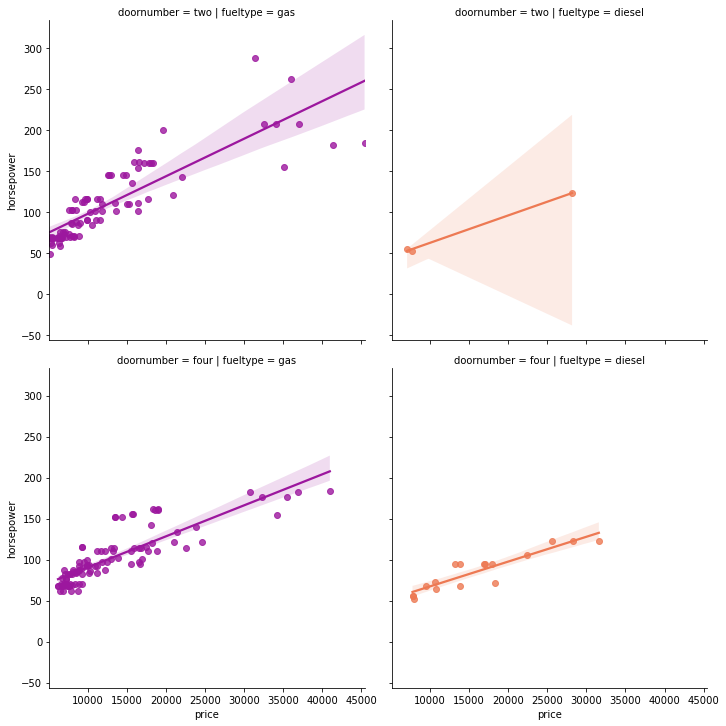

In [16]:
sns.lmplot('price', 'horsepower', mydata, 
           hue = 'fueltype', col = 'fueltype',  row = 'doornumber', 
           palette = 'plasma', 
           fit_reg = True);

In [17]:
smaller_df = mydata.select_dtypes(include=np.number).copy()

In [18]:
smaller_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,highway-L/100KM,cityLKM
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,8.703704,11.190476
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,8.703704,11.190476
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,9.038462,12.368421
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,7.833333,9.791667
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,10.681818,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,16845.0,8.392857,10.217391
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19045.0,9.400000,12.368421
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,21485.0,10.217391,13.055556
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,22470.0,8.703704,9.038462


In [19]:
doordummy=pd.get_dummies(mydata["doornumber"])
doordummy.head()

,four,two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [20]:
varialbeg=pd.get_dummies(mydata["fueltype"])
varialbeg.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
smaller_df = pd.concat([smaller_df, varialbeg], axis=1)
smaller_df = pd.concat([smaller_df, doordummy], axis=1)

In [22]:
smaller_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,highway-L/100KM,cityLKM,diesel,gas,four,two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,8.703704,11.190476,0,1,0,1
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,8.703704,11.190476,0,1,0,1
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,9.038462,12.368421,0,1,0,1
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,7.833333,9.791667,0,1,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,10.681818,13.055556,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,16845.0,8.392857,10.217391,0,1,1,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19045.0,9.400000,12.368421,0,1,1,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,21485.0,10.217391,13.055556,0,1,1,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,22470.0,8.703704,9.038462,1,0,1,0


# Split the Data

In [23]:
X = smaller_df.drop("price", axis = 1) 
Y= smaller_df['price']

In [24]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2,random_state=43)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=.25, random_state=43)

# Model Bulding

In [25]:
lm=LinearRegression()
lm.fit(X_train , Y_train)
lm.score(X_train , Y_train)

0.8718078817217976

In [26]:
lm.score(X_val , Y_val)

0.7810669632353356

In [27]:
X1=X.copy()
X1_train_val, X1_test, Y_train_val, Y_test = train_test_split(X1, Y, test_size=0.2,random_state=43)
X1_train, X1_val, Y_train, Y_val = train_test_split(X1_train_val, Y_train_val, test_size=.25, random_state=43)
X1['EXP1']=X1['highway-L/100KM']*X1['enginesize']
X1.drop(['highway-L/100KM','enginesize'],axis=1,inplace=True)

In [28]:
X1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,cityLKM,diesel,gas,four,two,EXP1
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,11.190476,0,1,0,1,1131.481481
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,11.190476,0,1,0,1,1131.481481
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,12.368421,0,1,0,1,1373.846154
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,9.791667,0,1,1,0,853.833333
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,13.055556,0,1,1,0,1452.727273


In [29]:
lm = LinearRegression()
lm.fit(X1_train,Y_train)
print(f'R^2 Train :{lm.score(X1_train,Y_train)}')
print(f'R^2 Val :{lm.score(X1_val,Y_val)}')
print(f'R^2 Test :{lm.score(X1_test,Y_test)}')

R^2 Train :0.8718078817217976
R^2 Val :0.7810669632353356
R^2 Test :0.7977011394484348


lm = LinearRegression()
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.values)
X_val_scaled=scaler.transform(X_val.values) # just transform in val and test 
X_test_scaled=scaler.transform(X_test.values)
lm_reg=Ridge(alpha=1)

In [30]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values) # just transform in val and test 
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [80]:
#validate

# lm.fit(X_train, Y_train)
# print(f'Linear Regression val R^2: {lm.score(X_val, Y_val):.3f}')

# lm_reg.fit(X_train_scaled, Y_train)
# print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, Y_val):.3f}')

# lm_poly.fit(X_train_poly, Y_train)
# print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, Y_val):.3f}')

 # Lasoo

In [32]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [33]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [34]:
lasso_model = Lasso(alpha = 300)
lasso_model.fit(X_tr,Y_train)

Lasso(alpha=300)

In [35]:
list(zip(X_train.columns, lasso_model.coef_))

[('symboling', 12.335429590947383),
 ('wheelbase', 0.0),
 ('carlength', 0.0),
 ('carwidth', 650.0383108016247),
 ('carheight', 0.0),
 ('curbweight', 0.0),
 ('enginesize', 4428.530936473612),
 ('boreratio', 0.0),
 ('stroke', -440.84662677060953),
 ('compressionratio', 0.0),
 ('horsepower', 1363.5332848731455),
 ('peakrpm', 307.75462631524414),
 ('highway-L/100KM', 0.0),
 ('cityLKM', 1715.6427636343806),
 ('diesel', 911.9780272519571),
 ('gas', -0.0),
 ('four', -0.0),
 ('two', 0.0)]

In [36]:
smaller_df.drop("symboling", axis = 1, inplace = True)
smaller_df.drop("wheelbase", axis = 1, inplace = True)
smaller_df.drop("carlength", axis = 1, inplace = True)
smaller_df.drop("carwidth", axis = 1, inplace = True)
smaller_df.drop("curbweight", axis = 1, inplace = True)
smaller_df.drop("boreratio", axis = 1, inplace = True)
smaller_df.drop("highway-L/100KM", axis = 1, inplace = True)
smaller_df.drop("four", axis = 1, inplace = True)
smaller_df.drop("two" ,axis = 1, inplace = True)
smaller_df.drop("gas", axis = 1, inplace = True)
smaller_df.drop("compressionratio", axis = 1, inplace = True)

In [37]:
smaller_df

,carheight,enginesize,stroke,horsepower,peakrpm,price,cityLKM,diesel
0,48.8,130,2.68,111,5000,13495.0,11.190476,0
1,48.8,130,2.68,111,5000,16500.0,11.190476,0
2,52.4,152,3.47,154,5000,16500.0,12.368421,0
3,54.3,109,3.40,102,5500,13950.0,9.791667,0
4,54.3,136,3.40,115,5500,17450.0,13.055556,0
...,...,...,...,...,...,...,...,...
200,55.5,141,3.15,114,5400,16845.0,10.217391,0
201,55.5,141,3.15,160,5300,19045.0,12.368421,0
202,55.5,173,2.87,134,5500,21485.0,13.055556,0
203,55.5,145,3.40,106,4800,22470.0,9.038462,1


In [38]:
lm=LinearRegression()
lm.fit(X_train , Y_train)
lm.score(X_train , Y_train)

0.8718078817217976

In [39]:
lm.score(X_val , Y_val)

0.7810669632353356

# ridge

In [40]:
lr_model_ridge = Ridge(alpha =  1000000)
lr_model_ridge.fit(X_tr,Y_train)

Ridge(alpha=1000000)

In [41]:
list(zip(X_train.columns, lr_model_ridge.coef_))

[('symboling', -4.011796629228526e-05),
 ('wheelbase', 0.5741091985875707),
 ('carlength', 0.7057052911514273),
 ('carwidth', 0.7866594643632164),
 ('carheight', 0.045833287041538606),
 ('curbweight', 0.876555916212823),
 ('enginesize', 0.9278842077698762),
 ('boreratio', 0.6218776756570566),
 ('stroke', 0.07562458304963432),
 ('compressionratio', 0.07113830994396114),
 ('horsepower', 0.8772383313245736),
 ('peakrpm', -0.09784197063790301),
 ('highway-L/100KM', 0.8563644533964958),
 ('cityLKM', 0.8599777119822668),
 ('diesel', 0.11525017061688488),
 ('gas', -0.11525017061688486),
 ('four', -0.052134172312668405),
 ('two', 0.05213417231266841)]

In [42]:
lr_model_ridge = Ridge(alpha =  10000)
lr_model_ridge.fit(X_tr,Y_train)

Ridge(alpha=10000)

In [43]:
list(zip(X_train.columns, lr_model_ridge.coef_))

[('symboling', 0.972245137676834),
 ('wheelbase', 51.99151096944489),
 ('carlength', 64.3034680614381),
 ('carwidth', 72.3489632641134),
 ('carheight', 3.3206498526185757),
 ('curbweight', 80.76451164694326),
 ('enginesize', 86.49266557269583),
 ('boreratio', 56.975817509663415),
 ('stroke', 6.564306882716997),
 ('compressionratio', 6.711728770151095),
 ('horsepower', 81.74403199394284),
 ('peakrpm', -8.156440191058614),
 ('highway-L/100KM', 79.13393042636731),
 ('cityLKM', 79.66313663804252),
 ('diesel', 10.607106947671008),
 ('gas', -10.607106947671006),
 ('four', -5.875354339428092),
 ('two', 5.875354339428092)]

In [44]:
lasso_params = {'alpha':[0.05 , 0.09 , 0.08 , 0.07 , 0.010 , 0.7 , 0.10 , 0.9 , 0.8 , 0.2 , 0.20 , 0.66 , 0.19, 0.99 , 0.97 , 0.099 , 0,39 , 0,49 , 0,59 , 0.69 , 0.79, 0.89 , 0.99 , 0.95]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [45]:
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params).fit(X_tr, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459057782.0479126, tolerance: 768191.8527897828
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


In [46]:
lasso_grid.best_estimator_

Lasso(alpha=59)

In [47]:
lasso_grid.best_score_

0.8119290736558173

In [48]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [49]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [50]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, Y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [51]:
lasso_model.alpha_

47.68611697714469

In [52]:
list(zip(X_train.columns, lasso_model.coef_))

[('symboling', 297.4464545910349),
 ('wheelbase', -269.7941112262762),
 ('carlength', -495.98033915632743),
 ('carwidth', 1132.247015416948),
 ('carheight', 587.7140046270221),
 ('curbweight', 0.0),
 ('enginesize', 5243.715067962933),
 ('boreratio', -186.0943280249968),
 ('stroke', -850.6724457163974),
 ('compressionratio', 0.0),
 ('horsepower', 940.5312649926615),
 ('peakrpm', 873.0489148946009),
 ('highway-L/100KM', -0.0),
 ('cityLKM', 2036.1987980636047),
 ('diesel', 1456.7511814433299),
 ('gas', -0.0),
 ('four', -165.91540720101568),
 ('two', 2.913340752020598e-12)]

In [53]:
test_set_pred = lasso_model.predict(X_te)

In [54]:
from sklearn.linear_model import LassoCV
# Create 5 folds
kfold = KFold(n_splits=4, shuffle=True, random_state=13)

# Create model
model_lcv = LassoCV(cv=kfold)

# Fit model
model_lcv.fit(X_train, Y_train)
predictions = model_lcv.predict(X_train)
print("Train:", r2_score(Y_train, predictions))

# Evaluate
predictions = model_lcv.predict(X_val)
print("Validation:", r2_score(Y_val, predictions))

print("Alpha:", model_lcv.alpha_)

Train: 0.8227223403481104
Validation: 0.8194438968103686
Alpha: 3865.311086490515


#### Train data

In [55]:
lm=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123)


In [56]:
X_train.shape

(153, 18)

In [57]:
X_test.shape

(52, 18)

In [58]:
y_train.shape

(153,)

In [59]:
y_test.shape

(52,)

In [60]:
lm.fit(X_train , y_train)
lm.score(X_train , y_train)

0.8588101051569879

In [61]:
Y_pred = lm.predict(X_test)

In [62]:
Y_pred.shape

(52,)

In [63]:
y_train.shape

(153,)

In [64]:
np.sum((Y_pred- y_test)**2) #SSE

335607593.6158945

In [65]:
 def SSE(actuals, preds):
         return np.sum((actuals - preds)**2)

SSE(Y_pred,y_test)

335607593.6158945

In [66]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(Y_pred,y_test)

2540.4708589001857

In [67]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(Y_pred,y_test)

2017.8489072250543

In [68]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

In [69]:
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

R2(Y_pred,y_test) #pred for test

0.8054575351816661

#### validation data 


In [70]:
Y_pred.shape

(52,)

In [71]:
Y_val.shape

(41,)

In [72]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(Y_pred,y_test)

2540.4708589001857

In [73]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(Y_pred,y_test)

2017.8489072250543

In [74]:
def SST(y):
    return np.sum((y - np.mean(y))**2)
def R2(actuals, preds):
    return 1 - SSE(actuals, preds) / SST(actuals)

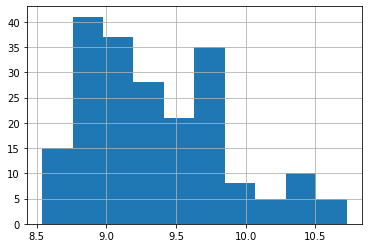

In [75]:
np.log(Y).hist();

In [77]:
#y_log=np.log(Y)